# Exploratory Data Analysis

In [ ]:
# Importing necessary libraries below:

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import glob
import pandas as pd
import seaborn as sns

In [ ]:
# Importing and mounting drive in order to access 'wheat blast image' dataset from my google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# In the lines below, I move the train and test datasets from google drive into the /tmp folder in google colabs so that I can use these data.

In [ ]:
#Import the libraries
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/train.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/test.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

## Displaying Some of the Images

In [ ]:
# Below I will plot random images of the data (before the images, I will denote where they are from) in order to get a feel for the dataset and what
# the images are like. This dataset was used by researchers publishing a scientific paper on using a CNN to classify wheat blasts, and so it does not
# contain unusable or irrelevant images. It was stated by the researchers that the photos were also taken under standardized conditions so that the 
# features of the wheat blasts can be highlighted, rather than the background.
# The dataset was already randomly split into 80% training and 20% testing data. Within training, images are labeled as being one of three categories.
# Each image only belongs to one category, and no image has no category. The three categories are the ones that I will try to predict.
# They are: Category 1: Healthy Spikes, Category 2: 0.1-20% Blast Severity, and Category 3: 20.1-100% Blast Severity. These same categories are in the
# test set too.

In [ ]:
# Showing random images in training set, Category_1:

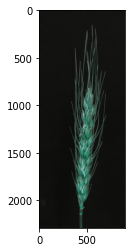

In [ ]:
img = cv2.imread("/tmp/train/Category_1/Exp_15_T11_R1_side1_010319_0.JPG")
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

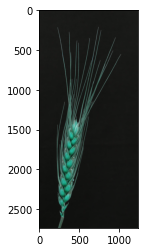

In [ ]:
img = cv2.imread("/tmp/train/Category_1/Exp_15_T17_R1_side1_120818_0.JPG")
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

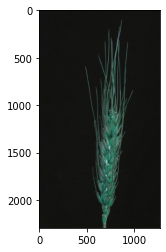

In [ ]:
img = cv2.imread("/tmp/train/Category_1/Exp_15_T41_R3_side3_122018_0.JPG")
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

In [ ]:
# Showing random images in training set, Category_2:

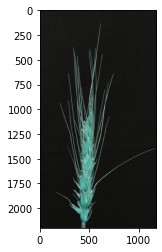

In [ ]:
img = cv2.imread("/tmp/train/Category_2/Exp_15_T12_R2_side1_120818_0.JPG")
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

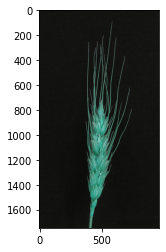

In [ ]:
img = cv2.imread("/tmp/train/Category_2/Xxp_25_T42_R1_sidX1_010219_1_1.JPG")
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

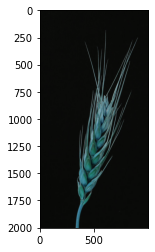

In [ ]:
img = cv2.imread("/tmp/train/Category_2/Yxp_25_T46_R2_sidY2_010919_2.JPG")
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

In [ ]:
# Showing random images in training data, Category_3:

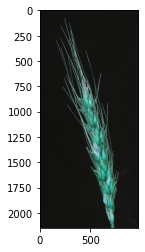

In [ ]:
img = cv2.imread("/tmp/train/Category_3/Exp_15_T18_R2_side2_121518_3.JPG")
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

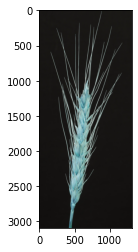

In [ ]:
img = cv2.imread("/tmp/train/Category_3/Xxp_25_T10_R2_sidX1_011419_10.JPG")
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

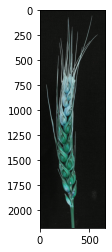

In [ ]:
img = cv2.imread("/tmp/train/Category_3/Zxp_15_T24_R4_sidZ2_122718_4.JPG")
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

In [ ]:
# Showing random image in TEST data, category_1:

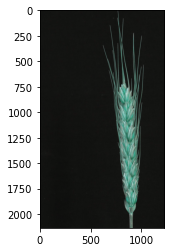

In [ ]:
img = cv2.imread("/tmp/test/Category_1/Exp_15_T23_R2_side4_121818_0.JPG")
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

In [ ]:
# Showing random image in TEST data, category_2:

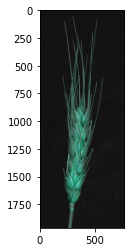

In [ ]:
img = cv2.imread("/tmp/test/Category_2/Exp_15_T48_R2_side4_121518_1.JPG")
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

In [ ]:
# Showing random image in test data, category_3:

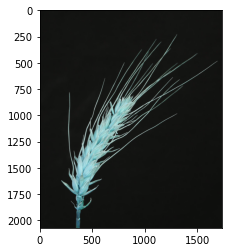

In [ ]:
img = cv2.imread("/tmp/test/Category_3/Yxp_15_T12_R1_sidY2_121518_10.JPG")
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

In [ ]:
# It may be subtle, but from looking at the random images from the training and testing data above, I can see a bit of a phenomenon that 
# Fernandez-Campos et al denoted, which is that spikes that have wheat blast have a bleached appearance.

## Plotting Image Sizes and Visualizing Aspect Ratio

In [ ]:
# Now, below, I will analyze various things regarding the images in the train and test datasets. To do so, I will start by creating a dataframe
# containing the file path, number of rows, and number of columns for each image file

In [ ]:
# creating a dataframe of image rows and columns:

In [ ]:
# creating a list for the file paths:
train_cat_1 = []

In [ ]:
# creating lists to store the number of rows and number of columns in the images:
tr_1_row = []
tr_1_col = []

In [ ]:
# retrieving each image one by one from the category 1 folder and appending the path name, # rows, and # cols to the 3 respective lists:
path = "/tmp/train/Category_1/*.*"
for file in glob.glob(path):
   train_cat_1.append(file)
   a=cv2.imread(file)
   tr_1_row.append(a.shape[0])
   tr_1_col.append(a.shape[1])

In [ ]:
# Below will create a dataframe containing the path, # rows and # cols for each image in the category 1 folder of the training set. This step and the
# steps leading up to it will be repeated below for all the images in category 2 and category 3.

In [ ]:
df = pd.DataFrame(list(zip(train_cat_1,tr_1_row,tr_1_col)),
              columns=['train_cat_1','tr_1_row','tr_1_col'])

In [ ]:
# creating a list for the file paths:
train_cat_2 = []

In [ ]:
# creating lists to store # rows and # cols for the images:
tr_2_row = []
tr_2_col = []

In [ ]:
# retrieving each image one by one from the category 1 folder and appending the path name, # rows, and # cols to the 3 respective lists:

In [ ]:
path = "/tmp/train/Category_2/*.*"
for file in glob.glob(path):
   train_cat_2.append(file)
   a=cv2.imread(file)
   tr_2_row.append(a.shape[0])
   tr_2_col.append(a.shape[1])

In [ ]:
# creating a dataframe for category 2:

In [ ]:
df2 = pd.DataFrame(list(zip(train_cat_2,tr_2_row,tr_2_col)),
              columns=['train_cat_2','tr_2_row','tr_2_col'])

In [ ]:
# creating list to store file paths:
train_cat_3 = []

In [ ]:
# creating lists to store # rows and # columns of images:
tr_3_row = []
tr_3_col = []

In [ ]:
# retrieving path, rows, cols for each image in the folder and appending to respective lists:

In [ ]:
path = "/tmp/train/Category_3/*.*"
for file in glob.glob(path):
   train_cat_3.append(file)
   a=cv2.imread(file)
   tr_3_row.append(a.shape[0])
   tr_3_col.append(a.shape[1])

In [ ]:
# creating category 3 dataframe:

In [ ]:
df3 = pd.DataFrame(list(zip(train_cat_3,tr_3_row,tr_3_col)),
              columns=['train_cat_3','tr_3_row','tr_3_col'])

In [ ]:
# inspecting the 3 dataframes created in last several steps:

In [ ]:
df.head()

,train_cat_1,tr_1_row,tr_1_col
0,/tmp/train/Category_1/Zxp_15_T17_R1_sidZ3_1220...,2456,1399
1,/tmp/train/Category_1/Zxp_15_T42_R2_sidZ4_1208...,2760,1162
2,/tmp/train/Category_1/Xxp_25_T36_R3_sidX1_1231...,1871,834
3,/tmp/train/Category_1/Yxp_25_T36_R2_sidY2_1221...,1939,1054
4,/tmp/train/Category_1/Zxp_15_T17_R2_sidZ1_1227...,2358,1317


In [ ]:
df2.head()

,train_cat_2,tr_2_row,tr_2_col
0,/tmp/train/Category_2/Yxp_25_T18_R1_sidY2_1226...,2131,1024
1,/tmp/train/Category_2/Yxp_25_T46_R3_sidY1_1228...,2121,1043
2,/tmp/train/Category_2/Yxp_25_T46_R1_sidY1_1231...,2020,1057
3,/tmp/train/Category_2/Xxp_25_T42_R1_sidX3_0102...,1983,997
4,/tmp/train/Category_2/Exp_15_T18_R3_side2_1218...,2033,976


In [ ]:
df3.head()

,train_cat_3,tr_3_row,tr_3_col
0,/tmp/train/Category_3/Exp_15_T6_R1_side2_01031...,1911,1547
1,/tmp/train/Category_3/Yxp_25_T10_R2_sidY1_0114...,3091,1311
2,/tmp/train/Category_3/Zxp_15_T36_R3_sidZ1_1218...,2145,1169
3,/tmp/train/Category_3/Zxp_15_T6_R1_sidZ4_12181...,2328,2084
4,/tmp/train/Category_3/Xxp_25_T42_R3_sidX1_0104...,2077,1060


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025 entries, 0 to 3024
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   train_cat_1  3025 non-null   object
 1   tr_1_row     3025 non-null   int64 
 2   tr_1_col     3025 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 71.0+ KB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   train_cat_2  1026 non-null   object
 1   tr_2_row     1026 non-null   int64 
 2   tr_2_col     1026 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 24.2+ KB


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   train_cat_3  709 non-null    object
 1   tr_3_row     709 non-null    int64 
 2   tr_3_col     709 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 16.7+ KB


In [ ]:
# giving labels to images in preparation for merging these 3 dataframes:

In [ ]:
df['label'] = 'cat1'

In [ ]:
df2['label'] = 'cat2'

In [ ]:
df3['label'] = 'cat3'

In [ ]:
df.head()

,train_cat_1,tr_1_row,tr_1_col,label
0,/tmp/train/Category_1/Zxp_15_T17_R1_sidZ3_1220...,2456,1399,cat1
1,/tmp/train/Category_1/Zxp_15_T42_R2_sidZ4_1208...,2760,1162,cat1
2,/tmp/train/Category_1/Xxp_25_T36_R3_sidX1_1231...,1871,834,cat1
3,/tmp/train/Category_1/Yxp_25_T36_R2_sidY2_1221...,1939,1054,cat1
4,/tmp/train/Category_1/Zxp_15_T17_R2_sidZ1_1227...,2358,1317,cat1


In [ ]:
df2.head()

,train_cat_2,tr_2_row,tr_2_col,label
0,/tmp/train/Category_2/Yxp_25_T18_R1_sidY2_1226...,2131,1024,cat2
1,/tmp/train/Category_2/Yxp_25_T46_R3_sidY1_1228...,2121,1043,cat2
2,/tmp/train/Category_2/Yxp_25_T46_R1_sidY1_1231...,2020,1057,cat2
3,/tmp/train/Category_2/Xxp_25_T42_R1_sidX3_0102...,1983,997,cat2
4,/tmp/train/Category_2/Exp_15_T18_R3_side2_1218...,2033,976,cat2


In [ ]:
df3.head()

,train_cat_3,tr_3_row,tr_3_col,label
0,/tmp/train/Category_3/Exp_15_T6_R1_side2_01031...,1911,1547,cat3
1,/tmp/train/Category_3/Yxp_25_T10_R2_sidY1_0114...,3091,1311,cat3
2,/tmp/train/Category_3/Zxp_15_T36_R3_sidZ1_1218...,2145,1169,cat3
3,/tmp/train/Category_3/Zxp_15_T6_R1_sidZ4_12181...,2328,2084,cat3
4,/tmp/train/Category_3/Xxp_25_T42_R3_sidX1_0104...,2077,1060,cat3


In [ ]:
# giving all 3 dataframes the same column names to make combining them easier:

In [ ]:
df.columns = ['path','row','col','label']

In [ ]:
df.head()

,path,row,col,label
0,/tmp/train/Category_1/Zxp_15_T17_R1_sidZ3_1220...,2456,1399,cat1
1,/tmp/train/Category_1/Zxp_15_T42_R2_sidZ4_1208...,2760,1162,cat1
2,/tmp/train/Category_1/Xxp_25_T36_R3_sidX1_1231...,1871,834,cat1
3,/tmp/train/Category_1/Yxp_25_T36_R2_sidY2_1221...,1939,1054,cat1
4,/tmp/train/Category_1/Zxp_15_T17_R2_sidZ1_1227...,2358,1317,cat1


In [ ]:
df2.columns = ['path','row','col','label']

In [ ]:
df3.columns = ['path','row','col','label']

In [ ]:
# combining the frames so that can have data on path, row, and col of all the training images in one single dataframe:

In [ ]:
frames = [df,df2,df3]

In [ ]:
result = pd.concat(frames)

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4760 entries, 0 to 708
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    4760 non-null   object
 1   row     4760 non-null   int64 
 2   col     4760 non-null   int64 
 3   label   4760 non-null   object
dtypes: int64(2), object(2)
memory usage: 185.9+ KB


In [ ]:
result.head()

,path,row,col,label
0,/tmp/train/Category_1/Zxp_15_T17_R1_sidZ3_1220...,2456,1399,cat1
1,/tmp/train/Category_1/Zxp_15_T42_R2_sidZ4_1208...,2760,1162,cat1
2,/tmp/train/Category_1/Xxp_25_T36_R3_sidX1_1231...,1871,834,cat1
3,/tmp/train/Category_1/Yxp_25_T36_R2_sidY2_1221...,1939,1054,cat1
4,/tmp/train/Category_1/Zxp_15_T17_R2_sidZ1_1227...,2358,1317,cat1


In [ ]:
# creating a column for aspect ratio:

In [ ]:
result['aspect_ratio'] = result['col']/result['row']

In [ ]:
# plotting rows, cols of all images, printing calculations

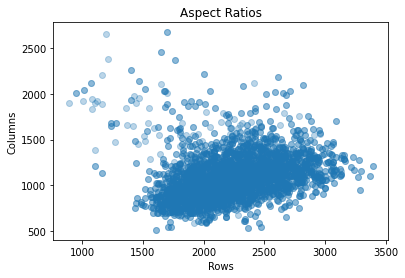

Mean Rows:  2226.92
Mean Columns:  1094.61
Mean Aspect Ratio:  0.5


In [ ]:
plt.scatter(result['row'], result['col'], alpha = 0.3)
plt.xlabel('Rows')
plt.ylabel('Columns')
plt.title('Aspect Ratios')
plt.show()
print('Mean Rows: ', round(np.mean(result['row']),2))
print('Mean Columns: ', round(np.mean(result['col']),2))
print('Mean Aspect Ratio: ', round(np.mean(result.aspect_ratio),2))

In [ ]:
# As can be seen from the plot above, there tends to be a cluster of images, but also plenty of outliers, mostly branching out to the top left.
# The main cluster of images seems to have # rows ranging from roughly a little less than 1,500 to a bit more than 3,000 and # cols ranging from roughly
# 500 to 1,500. The mean aspect ratio is reported as 0.5. This graph shows results for the entire training dataset, which includes images from all 3
# categories, 1, 2, and 3. It will be interesting to learn if images are even more tightly clustered within each category, and if mean aspect ratio
# and # rows, # cols varies significantly between category 1, 2 and 3. This will be examined below. While all the images are within a size range that
# makes them useful for practical purposes, and Fernandez-Campos et al, who published the dataset, reported that they tried to standardize the process
# of taking images, there may be some variation between categories.

In [ ]:
# Lets make another plot of aspect ratios, this time just subsetting category 1 images in the training dataset:

In [ ]:
df['aspect_ratio'] = df['col']/df['row']

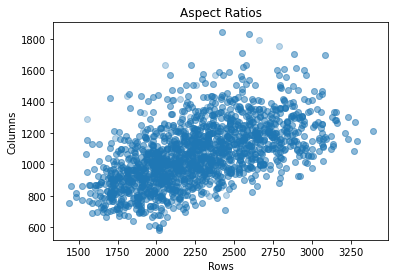

Mean Rows:  2269.4
Mean Columns:  1066.22
Mean Aspect Ratio:  0.47


In [ ]:
plt.scatter(df['row'], df['col'], alpha = 0.3)
plt.xlabel('Rows')
plt.ylabel('Columns')
plt.title('Aspect Ratios')
plt.show()
print('Mean Rows: ', round(np.mean(df['row']),2))
print('Mean Columns: ', round(np.mean(df['col']),2))
print('Mean Aspect Ratio: ', round(np.mean(df.aspect_ratio),2))

In [ ]:
# Here we can see a seemingly tighter cluster with fewer outliers than the plot of the entire training set. Nonetheless, mean rows, mean columns, and 
# mean aspect ratio seem pretty close to the overall training set.

In [ ]:
# Lets make another plot of aspect ratios, this time just subsetting category 2 images in the training dataset:

In [ ]:
df2['aspect_ratio'] = df2['col']/df2['row']

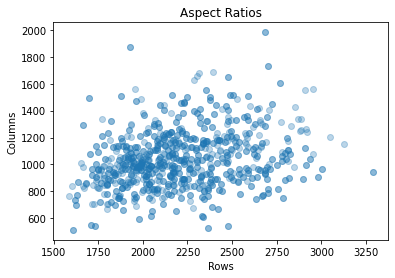

Mean Rows:  2209.31
Mean Columns:  1039.88
Mean Aspect Ratio:  0.48


In [ ]:
plt.scatter(df2['row'], df2['col'], alpha = 0.3)
plt.xlabel('Rows')
plt.ylabel('Columns')
plt.title('Aspect Ratios')
plt.show()
print('Mean Rows: ', round(np.mean(df2['row']),2))
print('Mean Columns: ', round(np.mean(df2['col']),2))
print('Mean Aspect Ratio: ', round(np.mean(df2.aspect_ratio),2))

In [ ]:
# Overall, the mean values are also pretty similar to overall training set.

In [ ]:
# Lets make another plot of aspect ratios, this time just subsetting category 3 images in the training dataset:

In [ ]:
df3['aspect_ratio'] = df3['col']/df3['row']

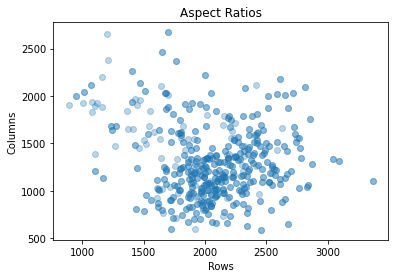

Mean Rows:  2071.14
Mean Columns:  1294.94
Mean Aspect Ratio:  0.66


In [ ]:
plt.scatter(df3['row'], df3['col'], alpha = 0.3)
plt.xlabel('Rows')
plt.ylabel('Columns')
plt.title('Aspect Ratios')
plt.show()
print('Mean Rows: ', round(np.mean(df3['row']),2))
print('Mean Columns: ', round(np.mean(df3['col']),2))
print('Mean Aspect Ratio: ', round(np.mean(df3.aspect_ratio),2))

In [ ]:
# This category appears to have the aspect ratio most different from the overall training set, and the least clustered images.
# It could be useful to know that this category of training images seems to have the least consistent images, at least where size and aspect ratio
# are concerned.

In [ ]:
result.head()

,path,row,col,label,aspect_ratio
0,/tmp/train/Category_1/Zxp_15_T17_R1_sidZ3_1220...,2456,1399,cat1,0.569625
1,/tmp/train/Category_1/Zxp_15_T42_R2_sidZ4_1208...,2760,1162,cat1,0.421014
2,/tmp/train/Category_1/Xxp_25_T36_R3_sidX1_1231...,1871,834,cat1,0.445751
3,/tmp/train/Category_1/Yxp_25_T36_R2_sidY2_1221...,1939,1054,cat1,0.543579
4,/tmp/train/Category_1/Zxp_15_T17_R2_sidZ1_1227...,2358,1317,cat1,0.558524


# Visualizing the Number of Images in Dataset/Subsets

In [ ]:
# In the plots below, I will provide simple visualizations of the number of images in different categories/sets. This will provide an overview
# of the size of the dataset and the size of different sets relative to one another.

In [ ]:
# Determining the list of each of the folders below. The wheat blast prediction problem can be viewed as a categorical classification problem
# with three categories, no blast, moderate blast (0.1-20% severity), and severe blast (20.1-100% severity). The dataset came pre-arranged into these
# categories and also split into training and testing. The folder paths for these sets are seen below.

In [ ]:
# In the following lines, a dataframe containing each set's name and # of images in that set will be created.

In [ ]:
len_tr_1 = len(os.listdir('/tmp/train/Category_1'))
len_tr_2 = len(os.listdir('/tmp/train/Category_2'))
len_tr_3 = len(os.listdir('/tmp/train/Category_3'))
len_te_1 = len(os.listdir('/tmp/test/Category_1'))
len_te_2 = len(os.listdir('/tmp/test/Category_2'))
len_te_3 = len(os.listdir('/tmp/test/Category_3'))

In [ ]:
list_1 = ['train_cat_1','train_cat_2','train_cat_3','test_cat_1','test_cat_2','test_cat_3']
list_2 = [len_tr_1,len_tr_2,len_tr_3,len_te_1,len_te_2,len_te_3]

In [ ]:
df2 = pd.DataFrame(list(zip(list_1,list_2)),
              columns=['set_name','num_images'])

In [ ]:
df2.head()

,set_name,num_images
0,train_cat_1,3026
1,train_cat_2,1027
2,train_cat_3,710
3,test_cat_1,709
4,test_cat_2,301


In [ ]:
df2

,set_name,num_images
0,train_cat_1,3026
1,train_cat_2,1027
2,train_cat_3,710
3,test_cat_1,709
4,test_cat_2,301
5,test_cat_3,201


In [ ]:
# The plot below shows the number of images in the training set (split into the 3 categories), and the testing set (split into 3 categories).
# It can be seen in this plot that for a given category, the train bar appears about 4x higher than the test bar, because the test split of 0.20.
# Also, within either the training set, or the testing set, it can be seen that there is great size difference between categories.
# Thus, this graph illustrates that we have an unbalanced dataset.

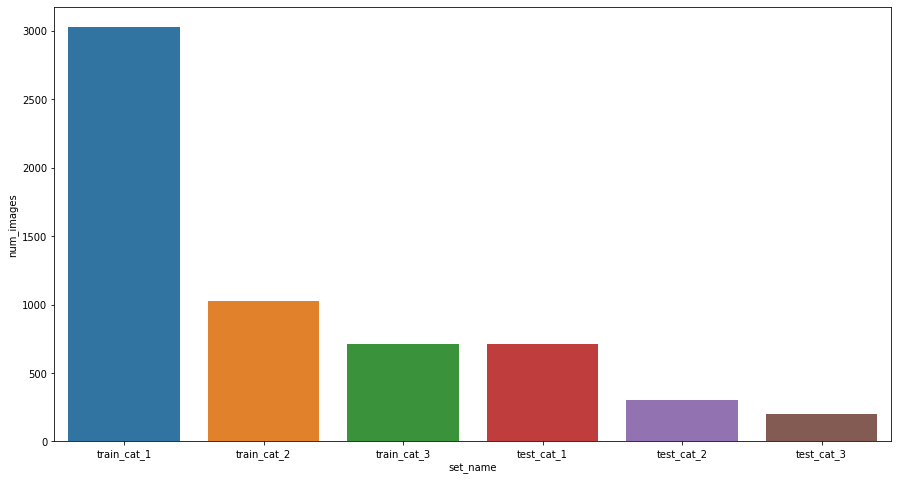

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x='set_name',y='num_images',data=df2)

In [ ]:
# While it is possible to see the overall comparison of each category_set in the graph above, in the follow graphs below
# more visualizations are made, often from just selecting/combining a few of the sets, to further visually illustrate the size differences
# between various subsets of the dataset. 

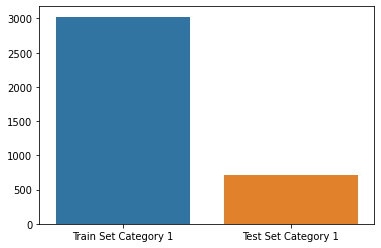

In [ ]:
dict_1 = {'Train Set Category 1': 3026, 'Test Set Category 1':709}
sns.barplot(x=list(dict_1.keys()),y=list(dict_1.values()))

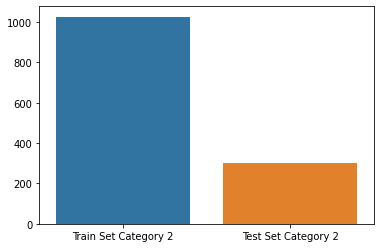

In [ ]:
dict_2 = {'Train Set Category 2': 1027, 'Test Set Category 2':301}
sns.barplot(x=list(dict_2.keys()),y=list(dict_2.values()))

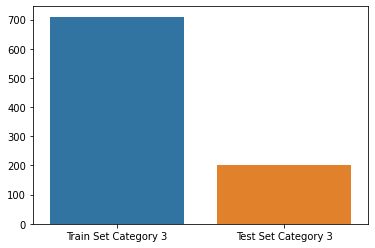

In [ ]:
dict_3 = {'Train Set Category 3': 710, 'Test Set Category 3':201}
sns.barplot(x=list(dict_3.keys()),y=list(dict_3.values()))

In [ ]:
# all training sets vs all testing sets:

In [ ]:
df2

,set_name,num_images
0,train_cat_1,3026
1,train_cat_2,1027
2,train_cat_3,710
3,test_cat_1,709
4,test_cat_2,301
5,test_cat_3,201


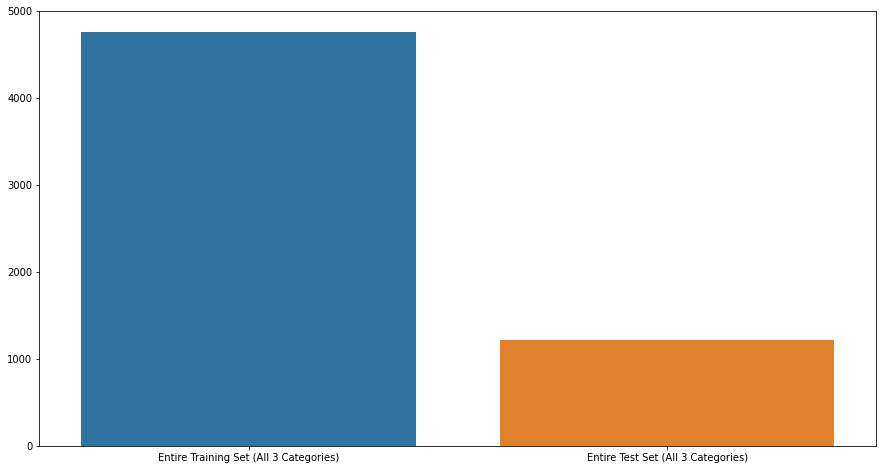

In [ ]:
dict_4 = {'Entire Training Set (All 3 Categories)': 3026 + 1027 + 710, 'Entire Test Set (All 3 Categories)':709 + 301 + 201}
plt.figure(figsize=(15,8))
sns.barplot(x=list(dict_4.keys()),y=list(dict_4.values()))

In [ ]:
# all categories against each other:

In [ ]:
df2

,set_name,num_images
0,train_cat_1,3026
1,train_cat_2,1027
2,train_cat_3,710
3,test_cat_1,709
4,test_cat_2,301
5,test_cat_3,201


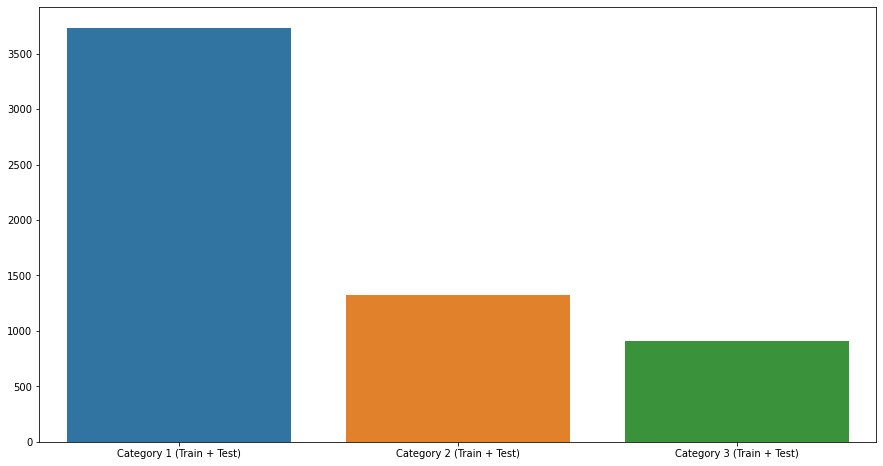

In [ ]:
dict_5 = {'Category 1 (Train + Test)': 3026 + 709, 'Category 2 (Train + Test)': 1027 + 301,'Category 3 (Train + Test)': 710 + 201}
plt.figure(figsize=(15,8))
sns.barplot(x=list(dict_5.keys()),y=list(dict_5.values()))

## Image Feature Analysis

In [ ]:
# Below, one random image from each of the three categories are compared side by side, and in steps below further image analysis is performed, namely,
# Canny edge detection, fast feature detection, and plotting fast features along the x-axis, and the y-axis.
# Part of the goal of the exploration of the data performed below is to try to find differences/hints that the machine learning will pick up on,
# or could potentially be trained to pick up on. The steps below can also help highlight if there are true/obvious differences between the categories
# that are visible to the naked eye (either in photo or in graph).

In [ ]:
# First, plotting images side by side

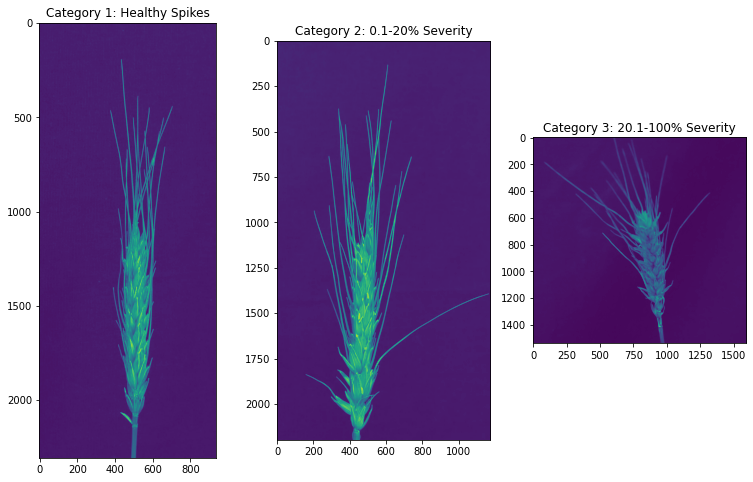

In [ ]:
img_category_1 = cv2.imread('/tmp/train/Category_1/Exp_15_T11_R2_side3_122018_0.JPG', cv2.IMREAD_GRAYSCALE)
img_category_2 = cv2.imread('/tmp/train/Category_2/Exp_15_T12_R2_side1_120818_0.JPG', cv2.IMREAD_GRAYSCALE)
img_category_3 = cv2.imread('/tmp/train/Category_3/Exp_15_T12_R1_side4_121118_10.JPG', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize = (13,8))

plt.subplot(1,3,1)
plt.imshow(img_category_1)
plt.title('Category 1: Healthy Spikes')

plt.subplot(1,3,2)
plt.imshow(img_category_2)
plt.title('Category 2: 0.1-20% Severity')

plt.subplot(1,3,3)
plt.imshow(img_category_3)
plt.title('Category 3: 20.1-100% Severity')
plt.show()

In [ ]:
# Defining the auto canny edge detection.

In [ ]:
def auto_canny(image, sigma = 0.5):
  # find median
  image_median = np.median(image)

  # using median, apply automatic Canny edge detection
  lower = int(max(0, (1.0 - sigma) * image_median))
  upper = int(min(255, (1.0 + sigma) * image_median))
  edged = cv2.Canny(image, lower, upper)
  return edged

In [ ]:
# Plotting the auto canny edges for each image:

Text(0.5, 1.0, 'Category 3: 20.1-100% Severity')

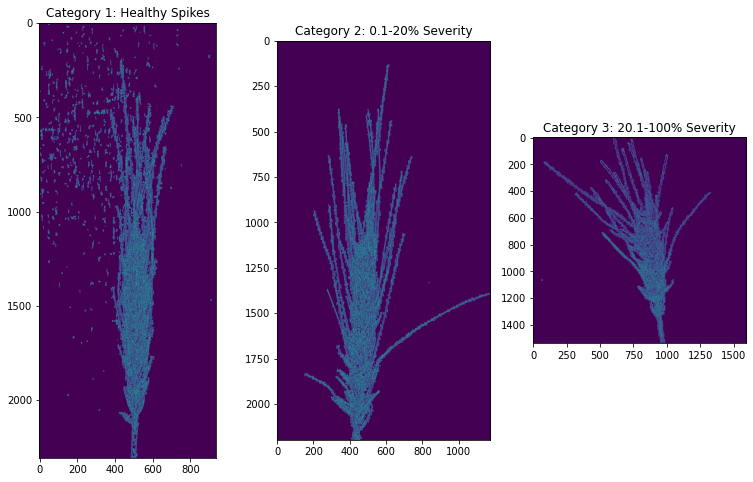

In [ ]:
plt.figure(figsize = (13,8))

plt.subplot(1,3,1)
plt.imshow(auto_canny(img_category_1))
plt.title('Category 1: Healthy Spikes')

plt.subplot(1,3,2)
plt.imshow(auto_canny(img_category_2))
plt.title('Category 2: 0.1-20% Severity')

plt.subplot(1,3,3)
plt.imshow(auto_canny(img_category_3))
plt.title('Category 3: 20.1-100% Severity')

In [ ]:
# It does not seem easy to detect blast or lack of blast with the naked eye from the edges plotted above. Perhaps this is because blast more causes an
# area of the spike to become a different color, rather than being visible as an edge or changing an edge. As a result, it is unclear how useful
# canny edge detection will be for feature detection. Based on this preliminary finding, it seems like fast detection (below) may be the better bet.

In [ ]:
# Fast Feature Detection:

In [ ]:
def fast_detection(image):
  # detect features with the fast feature detector
  img_fast = image.copy()
  img_temp = img_fast * 0

  fast = cv2.FastFeatureDetector_create()
  fast.setNonmaxSuppression(False)

  kp = fast.detect(img_fast, None)
  kp_img = cv2.drawKeypoints(img_temp, kp, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

  return kp_img

In [ ]:
# Plotting the fast features for each image:

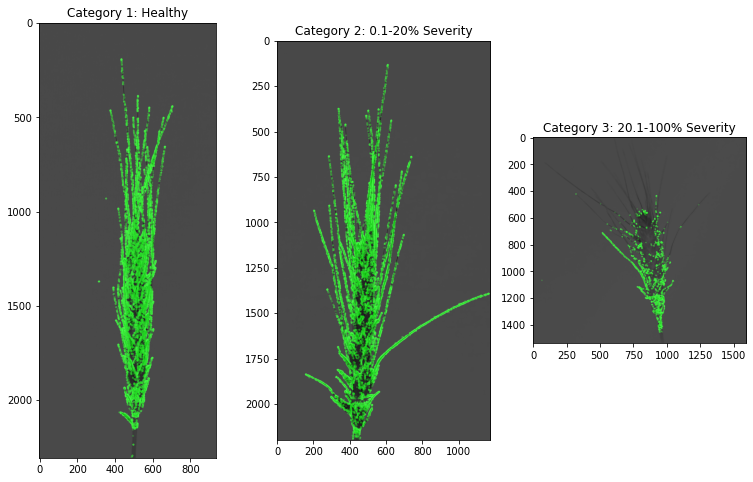

In [ ]:
plt.figure(figsize=(13,8))

plt.subplot(1,3,1)
plt.imshow(fast_detection(img_category_1))
plt.imshow(img_category_1,alpha=0.3, cmap='Greys')
plt.title('Category 1: Healthy')

plt.subplot(1,3,2)
plt.imshow(fast_detection(img_category_2))
plt.imshow(img_category_2,alpha=0.3, cmap='Greys')
plt.title('Category 2: 0.1-20% Severity')

plt.subplot(1,3,3)
plt.imshow(fast_detection(img_category_3))
plt.imshow(img_category_3,alpha=0.3, cmap='Greys')
plt.title('Category 3: 20.1-100% Severity')


plt.show()

In [ ]:
# In the graphs of features produced above it seems very easy to detect blast, even a small amount of it (in the 0.1-20% range) with the naked eye. 
# The dark spots on the spikes where there are not features are places where there is blast. Blast can be seen as a bleached/discolored area on the
# spike. In the category 3, blast is extremely evident, and even category 2 seems very distinguishable from category 1. Thus, based on preliminary
# findings, fast feature detection seems far more effective at finding useful features than canny edge detection.

In [ ]:
# If you imagine each image as an array of pixel values (which is what the image is represented as on the computer), it will help to understand the 
# process below. The plot below displays the average pixel value (aka intensity) for each pixel-column of the image. Thus, the x-axis of each graph
# below corresponds to each image's x-axis, and the y-axis of the graph corresponds to the average intensity of all the y-values of the image, at that 
# given x-value.

# The code cell after this one below will create a graph that shows the pixel-average across the rows (instead of columns) of the image. Thus, the
# x-axis of that graph will correspond to the y-axis of the image, and the y-axis of the graph will correspond to the average pixel value of 
# that row in the image. And so, the first graph below shows the intensity of the graph along the horizontal, and the second graph shows intensity
# along the vertical. 

# The intensity is the average of the fast detection features. 
# Thus, higher values on the graphs will show places where there is more pixel intensity in the image. 

In [ ]:
# In graph below, graph x-axis=image x-axis. y-axis is average pixel intensity of image column.

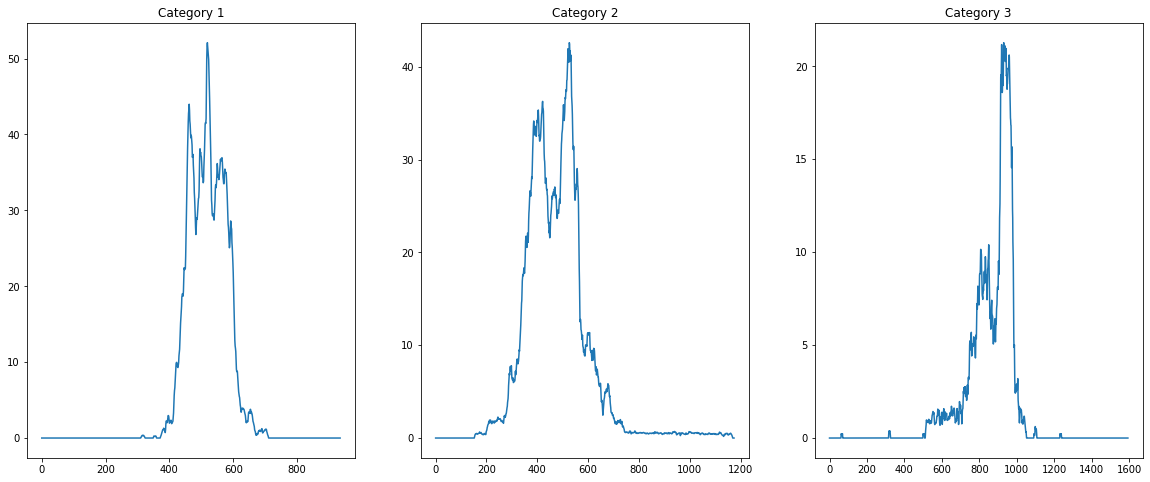

In [ ]:
img_category_1_fastplot = fast_detection(img_category_1)
test_list1 = []
#move along the x-axis and take the average of all the pixels along the y-axis
for i in range(img_category_1_fastplot.shape[1]):
  x = img_category_1_fastplot[:,i,:].mean()
  test_list1.append(x)

#move along the x-axis and take the average of all the pixels along the y-axis
img_category_2_fastplot = fast_detection(img_category_2)
test_list2 = []
for i in range(img_category_2_fastplot.shape[1]):
  x = img_category_2_fastplot[:,i,:].mean()
  test_list2.append(x)

#move along the x-axis and take the average of all the pixels along the y-axis
img_category_3_fastplot = fast_detection(img_category_3)
test_list3 = []
for i in range(img_category_3_fastplot.shape[1]):
  x = img_category_3_fastplot[:,i,:].mean()
  test_list3.append(x)

#plot the cross sectional averages
plt.figure(figsize = (20,8))

plt.subplot(1,3,1)
plt.title('Category 1')
plt.plot(test_list1)

plt.subplot(1,3,2)
plt.title('Category 2')
plt.plot(test_list2)

plt.subplot(1,3,3)
plt.title('Category 3')
plt.plot(test_list3)

In [ ]:
# Here in the graph above, noticeable, but not extreme, differences can be seen between category 1 and category 2. Furthermore, even more noticeable
# differences can be seen between category 1 and category 3. Thus, these graphs of the aggregated fast features seem to be potentially useful
# at distinguishing between category. However, these are just 3 randomly sampled images, so below I will try another 3 random images, and then graphs
# of aggregated images. In addition, aggregation along rows of the images (instead of columns) will be explored to see if this can also be used
# to distinguish category.

In [ ]:
# In graph below, graph x-axis = image y-axis. graph y-axis is average pixel intensity of image row.

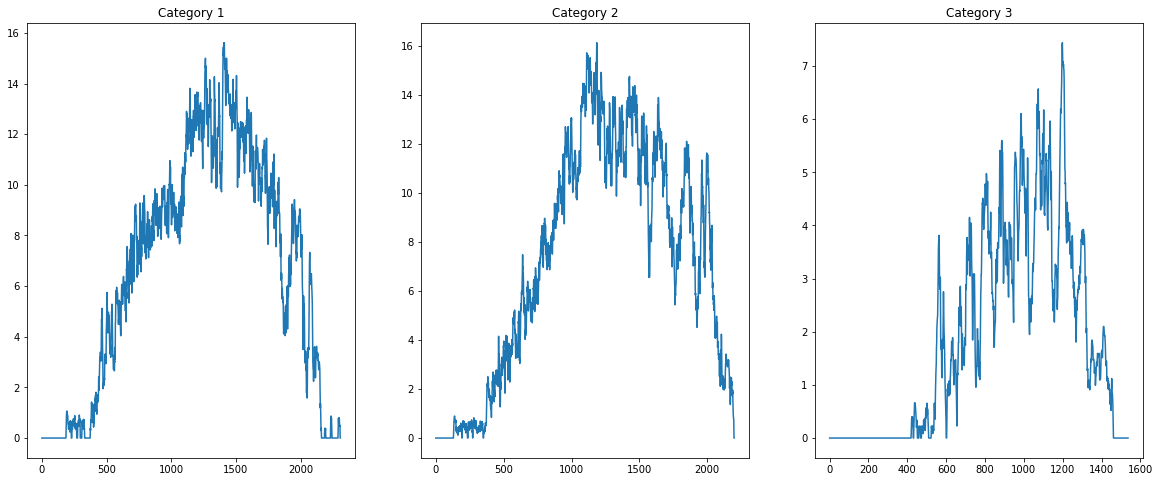

In [ ]:
img1_fastplot = fast_detection(img_category_1)
test_list1 = []
#move along the x-axis and take the average of all the pixels along the y-axis
for i in range(img_category_1_fastplot.shape[0]):
  x = img_category_1_fastplot[i,:,:].mean()
  test_list1.append(x)

#move along the x-axis and take the average of all the pixels along the y-axis
img2_fastplot = fast_detection(img_category_2)
test_list2 = []
for i in range(img_category_2_fastplot.shape[0]):
  x = img_category_2_fastplot[i,:,:].mean()
  test_list2.append(x)

#move along the x-axis and take the average of all the pixels along the y-axis
img3_fastplot = fast_detection(img_category_3)
test_list3 = []
for i in range(img_category_3_fastplot.shape[0]):
  x = img_category_3_fastplot[i,:,:].mean()
  test_list3.append(x)

#plot the cross sectional averages
plt.figure(figsize = (20,8))

plt.subplot(1,3,1)
plt.title('Category 1')
plt.plot(test_list1)

plt.subplot(1,3,2)
plt.title('Category 2')
plt.plot(test_list2)

plt.subplot(1,3,3)
plt.title('Category 3')
plt.plot(test_list3)

In [ ]:
# The graphs above, showing aggregated features along the y-axis of images, seem less easy to visually differentiate than the x-axis aggregation graphs 
# above.

# However, still, like the graphs above, category 1 and 2 seem similar but noticeably different, and category 3 seems very different from category 1.

In [ ]:
# checking other random set of images:

In [ ]:
img_category_1 = cv2.imread('/tmp/train/Category_1/Exp_15_T17_R3_side3_121118_0.JPG', cv2.IMREAD_GRAYSCALE)
img_category_2 = cv2.imread('/tmp/train/Category_2/Yxp_25_T46_R4_sidY4_010919_2.JPG', cv2.IMREAD_GRAYSCALE)
img_category_3 = cv2.imread('/tmp/train/Category_3/Zxp_15_T6_R3_sidZ1_121818_10.JPG', cv2.IMREAD_GRAYSCALE)

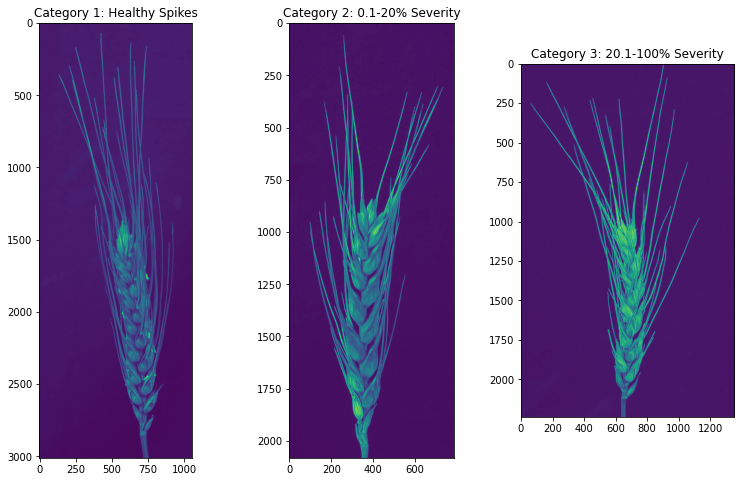

In [ ]:
plt.figure(figsize = (13,8))

plt.subplot(1,3,1)
plt.imshow(img_category_1)
plt.title('Category 1: Healthy Spikes')

plt.subplot(1,3,2)
plt.imshow(img_category_2)
plt.title('Category 2: 0.1-20% Severity')

plt.subplot(1,3,3)
plt.imshow(img_category_3)
plt.title('Category 3: 20.1-100% Severity')
plt.show()

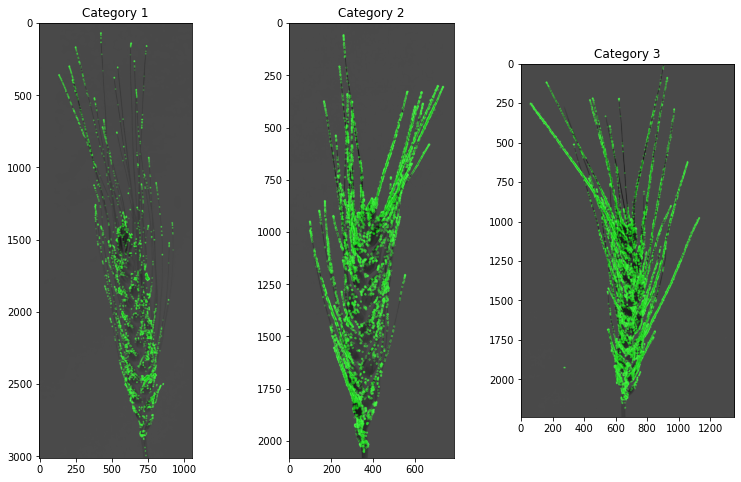

In [ ]:
plt.figure(figsize=(13,8))

plt.subplot(1,3,1)
plt.imshow(fast_detection(img_category_1))
plt.imshow(img_category_1, alpha=0.3, cmap='Greys')
plt.title('Category 1')

plt.subplot(1,3,2)
plt.imshow(fast_detection(img_category_2))
plt.imshow(img_category_2, alpha=0.3, cmap='Greys')
plt.title('Category 2')

plt.subplot(1,3,3)
plt.imshow(fast_detection(img_category_3))
plt.imshow(img_category_3, alpha=0.3, cmap='Greys')
plt.title('Category 3')

plt.show()

In [ ]:
# Here, in this fast feature plot above, it seems we see the opposite of the first feature plot. Category 1 has the most dark space on the spike,
# signifying lack of feature, and category 3 seems to have the most bright area on the spike signifying features. And so, it seems that the earlier
# hypothesis that the blast showed up as dark area on the spike may be incorrect. The example above raises the question of whether another factor
# could be causing lack of signal, such as shadow perhaps. In any case, these two contrasting examples seem to show that it is, in fact, difficult to 
# pick up on blast with the naked eye from a fast feature plot. 

In [ ]:
# In graph below, graph x-axis=image x-axis. y-axis is average pixel intensity of image column.

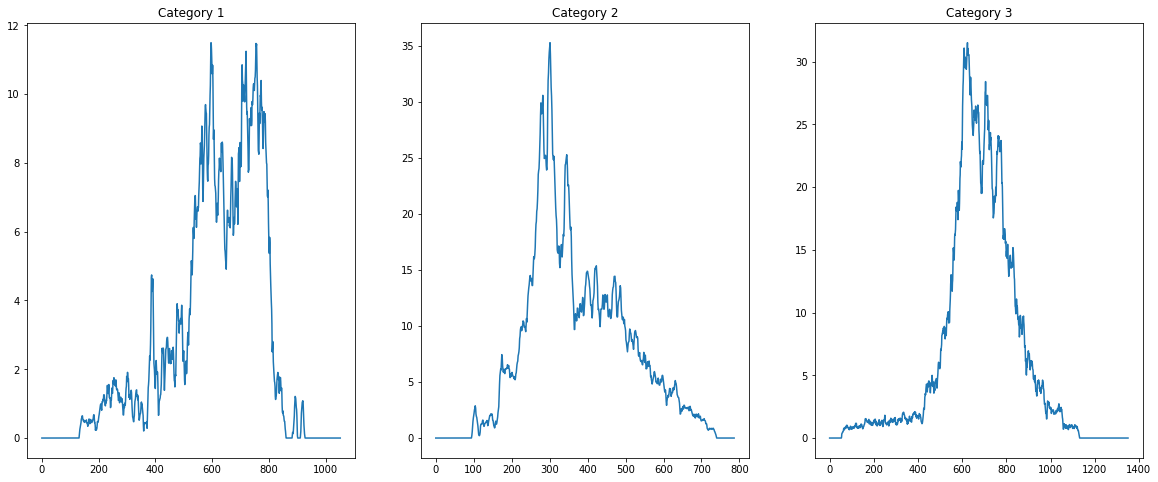

In [ ]:
img3_fastplot = fast_detection(img_category_1)
test_list3 = []
for i in range(img3_fastplot.shape[1]):
  x = img3_fastplot[:,i,:].mean()
  test_list3.append(x)

img4_fastplot = fast_detection(img_category_2)
test_list4 = []
for i in range(img4_fastplot.shape[1]):
  x = img4_fastplot[:,i,:].mean()
  test_list4.append(x)

img5_fastplot = fast_detection(img_category_3)
test_list5 = []
for i in range(img5_fastplot.shape[1]):
  x = img5_fastplot[:,i,:].mean()
  test_list5.append(x)

plt.figure(figsize = (20,8))

plt.subplot(1,3,1)
plt.title('Category 1')
plt.plot(test_list3)

plt.subplot(1,3,2)
plt.title('Category 2')
plt.plot(test_list4)

plt.subplot(1,3,3)
plt.title('Category 3')
plt.plot(test_list5)

In [ ]:
# In the graphs above, the graphs of each category appear noticeably different from each other. However, when compared to the three graphs aggregating
# columns before, the graph of each category now does not seem to the graph of each category then. Thus, there seems to be little consistency within
# the graphs of a given category. And so, it is still unclear how useful graphs can be at differentiating between categories reliably.

In [ ]:
# In graph below, graph x-axis = image y-axis. graph y-axis is average pixel intensity of image row.

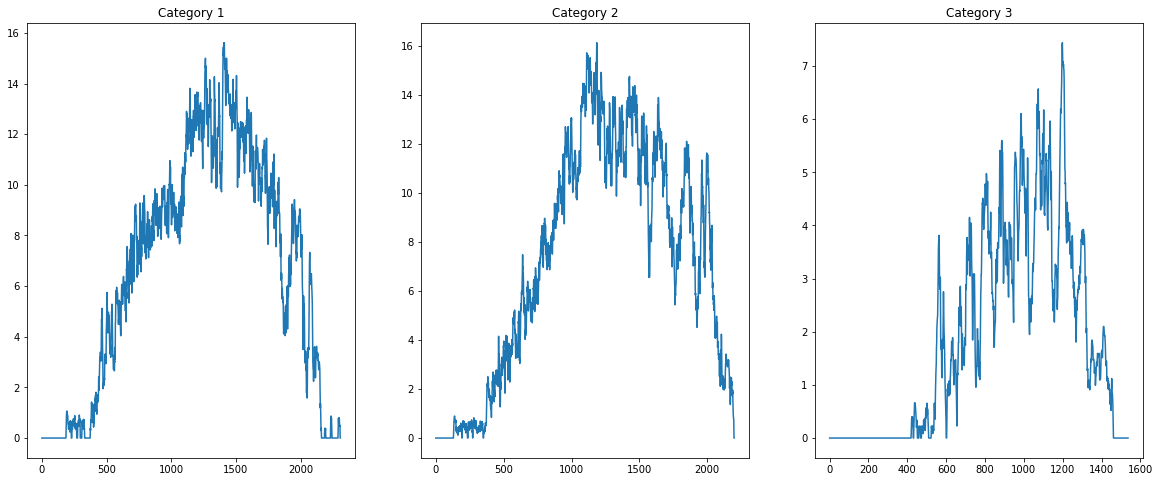

In [ ]:
img1_fastplot = fast_detection(img_category_1)
test_list1 = []
#move along the x-axis and take the average of all the pixels along the y-axis
for i in range(img_category_1_fastplot.shape[0]):
  x = img_category_1_fastplot[i,:,:].mean()
  test_list1.append(x)

#move along the x-axis and take the average of all the pixels along the y-axis
img2_fastplot = fast_detection(img_category_2)
test_list2 = []
for i in range(img_category_2_fastplot.shape[0]):
  x = img_category_2_fastplot[i,:,:].mean()
  test_list2.append(x)

#move along the x-axis and take the average of all the pixels along the y-axis
img3_fastplot = fast_detection(img_category_3)
test_list3 = []
for i in range(img_category_3_fastplot.shape[0]):
  x = img_category_3_fastplot[i,:,:].mean()
  test_list3.append(x)

#plot the cross sectional averages
plt.figure(figsize = (20,8))

plt.subplot(1,3,1)
plt.title('Category 1')
plt.plot(test_list1)

plt.subplot(1,3,2)
plt.title('Category 2')
plt.plot(test_list2)

plt.subplot(1,3,3)
plt.title('Category 3')
plt.plot(test_list3)

In [ ]:
# The graphs above seem more similar, comparing same category to same category, to the other row graphs. In fact, it is possible that, within a given
# category, these 'row' graphs are more consistent than the aggregated column graphs. Also, like the row graphs before, there seem clear visual
# differences in the three categories. Based on these preliminary results, the 'row' graphs seem more promising for identifying useful features than
# the 'column' graphs.

In [ ]:
# Now, below, for the final part of EDA, all images in the training dataset for each of the three categories will have their fast feature
# column intensity graphed. This will be graphed by averaging together all the images for a given category.

In [ ]:
# Create the function that provides the mean of the fast detection features of each column of the image:

In [ ]:
# define the function, read in each image, resize, and create list with average intensities for each column.
def fast_detection_mean(file_path):
  img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
  resized = cv2.resize(img, (300,200))

  image = fast_detection(resized)
  test_list = []
  for i in range(image.shape[1]):
    x = image[:,i,:].mean()
    test_list.append(x)

  return test_list

In [ ]:
# we already have a dataframe of image rows and columns from earlier that we can use:

In [ ]:
# Create a new column in the dataframe. Each single entry in this column contains the list of fast detection mean intensities for each column 
# for a given image.
result['avg'] = result.path.apply(fast_detection_mean)

In [ ]:
result.head()

,path,row,col,label,aspect_ratio,avg
0,/tmp/train/Category_1/Zxp_15_T17_R1_sidZ3_1220...,2456,1399,cat1,0.569625,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,/tmp/train/Category_1/Zxp_15_T42_R2_sidZ4_1208...,2760,1162,cat1,0.421014,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,/tmp/train/Category_1/Xxp_25_T36_R3_sidX1_1231...,1871,834,cat1,0.445751,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,/tmp/train/Category_1/Yxp_25_T36_R2_sidY2_1221...,1939,1054,cat1,0.543579,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.82..."
4,/tmp/train/Category_1/Zxp_15_T17_R2_sidZ1_1227...,2358,1317,cat1,0.558524,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
# package that 'avg' column into lists based on label (aka category):
cat1_fastplot = list(result[result.label == 'cat1'].avg)
cat2_fastplot = list(result[result.label == 'cat2'].avg)
cat3_fastplot = list(result[result.label == 'cat3'].avg)

In [ ]:

# find the mean of the averages
cat1_fastplot_mean = np.mean(cat1_fastplot, axis = 0)
cat2_fastplot_mean = np.mean(cat2_fastplot, axis = 0)
cat3_fastplot_mean = np.mean(cat3_fastplot, axis = 0)

<function matplotlib.pyplot.show>

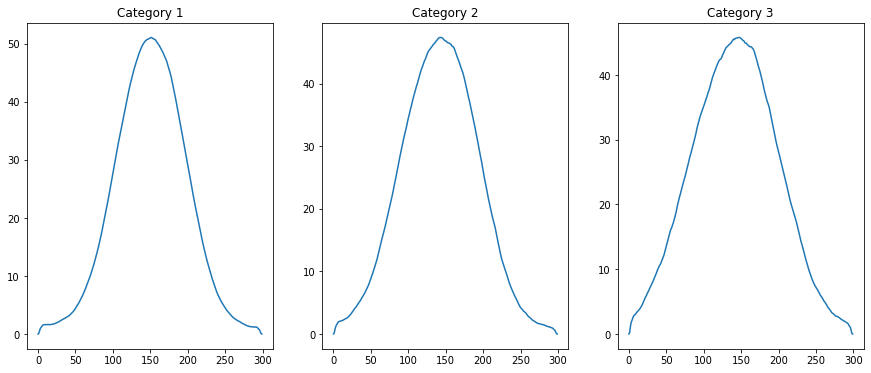

In [ ]:
# create plots of means by category
plt.figure(figsize = (15,6))

plt.subplot(1,3,1)
plt.plot(cat1_fastplot_mean)
plt.title('Category 1')

plt.subplot(1,3,2)
plt.plot(cat2_fastplot_mean)
plt.title('Category 2')

plt.subplot(1,3,3)
plt.plot(cat3_fastplot_mean)
plt.title('Category 3')


plt.show

In [ ]:
# The graphs above of mean pixel signal intensity value vs x-value (across all images in training set) seem to show little differentiation between
# categories in the tails of the graphs. However, the three peaks of the graphs seem to show subtly different shapes. It is possible that this hints
# at a useful feature to be discovered. 

In [ ]:
# Now, below, all images in the training dataset for each of the three categories will have their fast feature
# ROW intensity graphed. This will be graphed by averaging together all the images for a given category.

In [ ]:
# define the function, read in each image, resize, and create list with average intensities for each column.
def fast_detection_mean(file_path):
  img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
  resized = cv2.resize(img, (300,200))

  image = fast_detection(resized)
  test_list = []
  for i in range(image.shape[0]):
    x = image[i,:,:].mean()
    test_list.append(x)

  return test_list

In [ ]:
# Create a new column in the dataframe. Each single entry in this column contains the list of fast detection mean intensities for each column 
# for a given image.
result['yavg'] = result.path.apply(fast_detection_mean)

In [ ]:
result.head()

,path,row,col,label,aspect_ratio,avg,yavg
0,/tmp/train/Category_1/Zxp_15_T17_R1_sidZ3_1220...,2456,1399,cat1,0.569625,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.45111111111111113,..."
1,/tmp/train/Category_1/Zxp_15_T42_R2_sidZ4_1208...,2760,1162,cat1,0.421014,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.451..."
2,/tmp/train/Category_1/Xxp_25_T36_R3_sidX1_1231...,1871,834,cat1,0.445751,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.7411111111111112, 1.64555555..."
3,/tmp/train/Category_1/Yxp_25_T36_R2_sidY2_1221...,1939,1054,cat1,0.543579,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.82...","[0.0, 0.0, 3.1077777777777778, 4.29, 4.3844444..."
4,/tmp/train/Category_1/Zxp_15_T17_R2_sidZ1_1227...,2358,1317,cat1,0.558524,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.45111111111111113, 1.35..."


In [ ]:
# package that 'avg' column into lists based on label (aka category):
cat1_fastplot = list(result[result.label == 'cat1'].yavg)
cat2_fastplot = list(result[result.label == 'cat2'].yavg)
cat3_fastplot = list(result[result.label == 'cat3'].yavg)

In [ ]:
# find the mean of the averages
cat1_fastplot_mean = np.mean(cat1_fastplot, axis = 0)
cat2_fastplot_mean = np.mean(cat2_fastplot, axis = 0)
cat3_fastplot_mean = np.mean(cat3_fastplot, axis = 0)

<function matplotlib.pyplot.show>

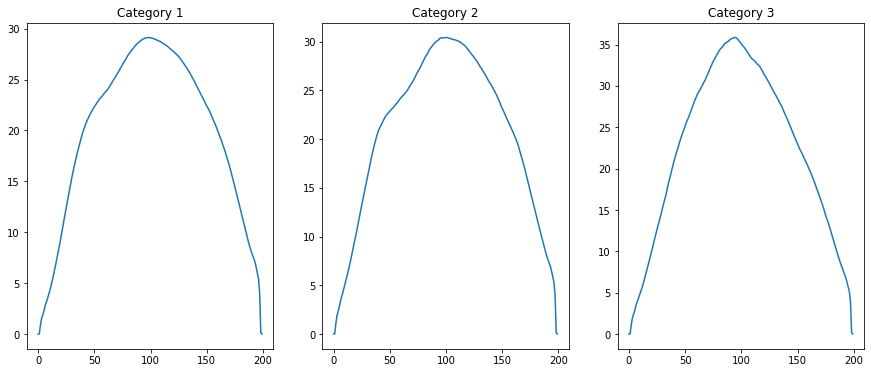

In [ ]:
# create plots of means by category
plt.figure(figsize = (15,6))

plt.subplot(1,3,1)
plt.plot(cat1_fastplot_mean)
plt.title('Category 1')

plt.subplot(1,3,2)
plt.plot(cat2_fastplot_mean)
plt.title('Category 2')

plt.subplot(1,3,3)
plt.plot(cat3_fastplot_mean)
plt.title('Category 3')


plt.show

In [ ]:
# The graphs above of mean pixel signal intensity vs y-value have somewhat different shapes. There are noticeably visual differences in the graphs,
# but, like the other graphs above it is unclear if the differences are significant enough to hint at useful features. 